# LGMVIPJUNE
## LetsGrowMore TASK 2

## Data Science Intern June 2022

## TASK 2 : Stock Market Prediction And Forecasting Using Stacked LSTM

Author :- Vaishnavi Adhao



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

Reading the Dataset

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


Data sorting

In [3]:
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [4]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


Visualization

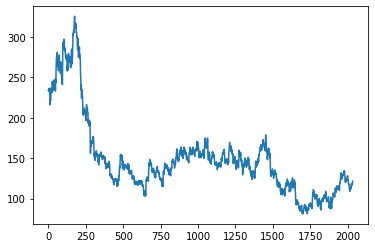

In [5]:
plt.plot(df['Close'])

In [6]:
dff=df['Close']
dff

2034    121.55
2033    120.90
2032    120.65
2031    117.60
2030    118.65
         ...  
4       233.30
3       236.10
2       234.25
1       233.25
0       233.75
Name: Close, Length: 2035, dtype: float64

MIN MAX Scaler

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
dff=scaler.fit_transform(np.array(dff).reshape(-1,1))
dff

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])


Spliting The Dataset

In [8]:
training_size=int(len(dff)*0.70)
test_size=len(dff)-training_size
train_data,test_data=dff[0:training_size,:],dff[training_size:len(dff),:1]

Convert an array of values into a dataset Matrixconvert an array of values into a dataset Matrix

In [9]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

Spliting Data into Train and Test

In [10]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [11]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [12]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

Creating the LSTM Model

In [13]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 11s 256ms/step - loss: 0.0126 - val_loss: 0.0013
Epoch 2/60
19/19 [==============================] - 4s 195ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 3/60
19/19 [==============================] - 4s 189ms/step - loss: 9.9553e-04 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 4s 188ms/step - loss: 9.2093e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 4s 211ms/step - loss: 8.5801e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 4s 224ms/step - loss: 8.2559e-04 - val_loss: 0.0012
Epoch 7/60
19/19 [==============================] - 4s 186ms/step - loss: 7.9645e-04 - val_loss: 0.0011
Epoch 8/60
19/19 [==============================] - 4s 189ms/step - loss: 7.6725e-04 - val_loss: 0.0011
Epoch 9/60
19/19 [==============================] - 4s 190ms/step - loss: 7.3764e-04 - val_loss: 9.5592e-04
Epoch 10/60
19/19 [==============================] - 4s 185ms/step 

In [15]:
test_predict=model.predict(X_test)

In [16]:
test_predicted=scaler.inverse_transform(test_predict)
test_predicted

array([[143.56657 ],
       [143.69038 ],
       [142.68417 ],
       [139.76517 ],
       [138.0447  ],
       [137.84142 ],
       [139.50201 ],
       [141.34001 ],
       [141.48744 ],
       [140.61406 ],
       [140.12244 ],
       [141.55421 ],
       [142.70491 ],
       [144.42572 ],
       [146.68272 ],
       [144.23924 ],
       [141.16922 ],
       [140.89796 ],
       [142.184   ],
       [148.03955 ],
       [152.84874 ],
       [154.33636 ],
       [153.64894 ],
       [150.97395 ],
       [151.02339 ],
       [151.56366 ],
       [152.41524 ],
       [154.21509 ],
       [154.73512 ],
       [154.28554 ],
       [154.45699 ],
       [153.25847 ],
       [149.79008 ],
       [143.72461 ],
       [140.38034 ],
       [140.1259  ],
       [140.9137  ],
       [140.00247 ],
       [136.9961  ],
       [132.65091 ],
       [130.05646 ],
       [129.3692  ],
       [127.66603 ],
       [126.91282 ],
       [124.75588 ],
       [121.83178 ],
       [121.082726],
       [121.0

Calculating Performance

In [17]:
performance = math.sqrt(mean_squared_error(ytest,test_predict))
performance

0.03910665552981021